# - **PYTHON BITIRME PROJESI**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Veri Setini Yükleme

In [8]:
# Banka müsterilerine ait verileri iceren veri setini yüklüyoruz.
# Bu veri seti, müsterilerin demografik bilgileri, harcama aliskanliklari ve banka ile olan etkilesimlerini igbi bircok bilgiyi iceriyor.

df = pd.read_csv('/workspaces/PYTHON_KURSU_BITIRME_PROJESI/BankChurners.csv')
print(df.head())

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

# Veriyi Okuma 

In [9]:
# Veri setindeki sütunlari ve veri türlerini kontrol ediyoruz.

print("Veri setinin genel bilgileri:")
print()
print(df.info())

Veri setinin genel bilgileri:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                            

In [10]:
# Eksik verileri kontrol edelim.

print(df.isnull().sum())

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [11]:
# Veri setinin genel özelliklerini inceleyelim.

print(df.describe())

          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%            

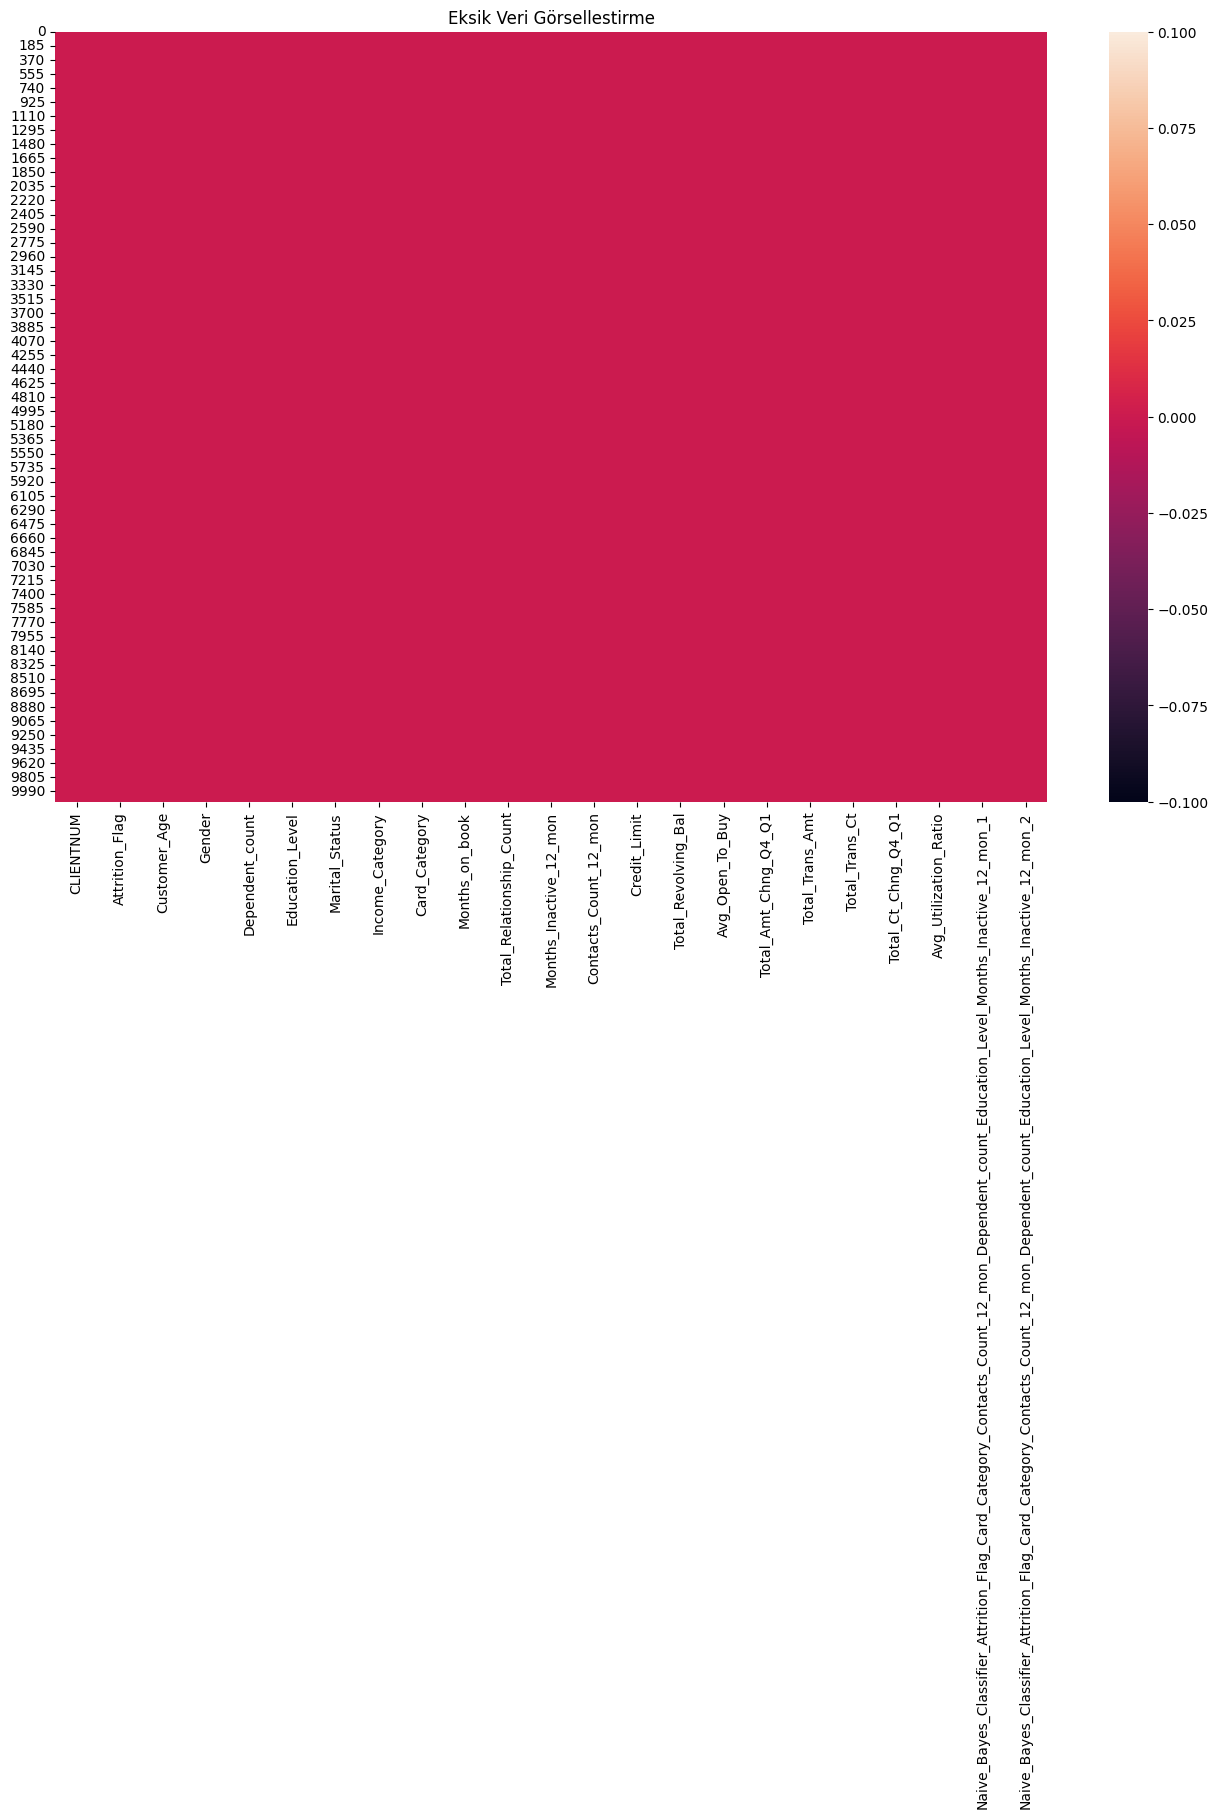

In [12]:
# Eksik veriler icin Heatmap.

plt.figure(figsize = (16,10))
sns.heatmap(df.isnull(), cbar = True)
plt.title("Eksik Veri Görsellestirme")
plt.show()

# Veriyi Analize Uygun Hale Getirme

In [13]:
# Analizi kolaylastirmak icin gereksiz sütunlari kaldiriyoruz.

df = df.iloc[:,:-2]
df.drop(columns = ['CLIENTNUM'], inplace = True)

In [14]:
df.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


# Mavi Kart Sahipleri ve Gelir Analizi

Banka müsterilerinin büyük bir kismi Mavi Kart sahibi olup yillik gelirleri $40K'in altindadir.

Bu durumun müsteri davranislarina etkisini analiz edecegiz.

In [15]:
print(df.columns)

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [16]:
mavi_kart_musterileri = df[(df['Card_Category'] == 'Blue') & (df['Income_Category'].isin(['$40K - $60K', '$60K - $80K']))]

print(mavi_kart_musterileri)

          Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
4      Existing Customer            40      M                3   
5      Existing Customer            44      M                2   
8      Existing Customer            37      M                3   
11     Existing Customer            65      M                1   
...                  ...           ...    ...              ...   
10115  Existing Customer            38      M                1   
10120  Existing Customer            54      M                1   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10125  Attrited Customer            30      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
4          Uneducated        Married     $60K - $80K          Blue 

In [17]:
mavi_kart_orani = len(mavi_kart_musterileri) / len(df) * 100

print(f"Mavi Kart sahiplerinden yillik geliri $40K - $60K arasinda olanlarin yüzdesi: {mavi_kart_orani:.2f}%")

Mavi Kart sahiplerinden yillik geliri $40K - $60K arasinda olanlarin yüzdesi: 29.11%


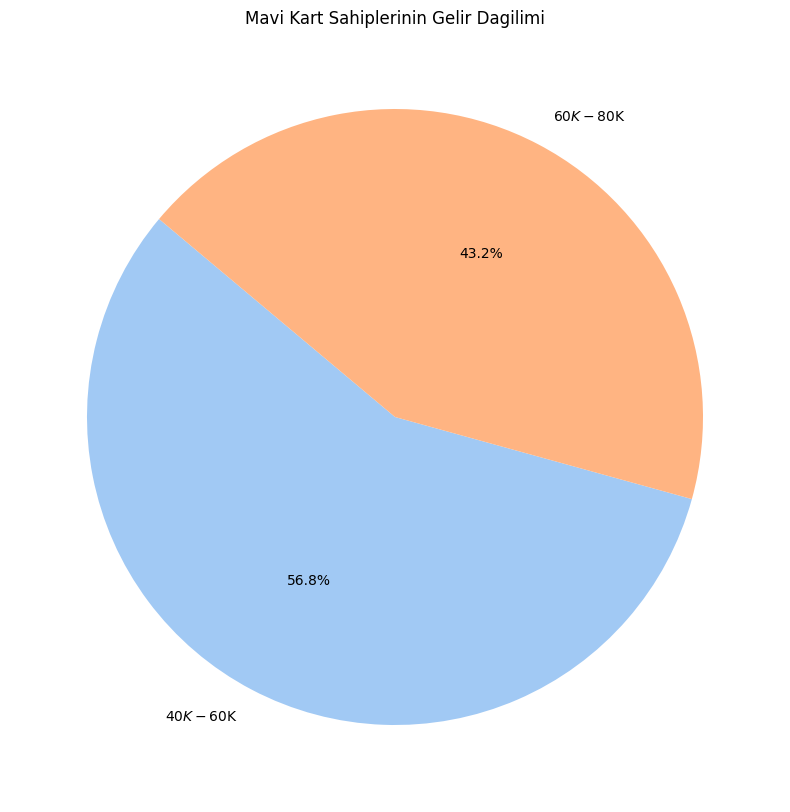

In [18]:
# Mavi Kart sahiplerinin gelir dagilim grafigi.

Gelir_Degerleri = mavi_kart_musterileri["Income_Category"].value_counts()

plt.figure(figsize=(16, 10))
plt.pie(Gelir_Degerleri, labels = Gelir_Degerleri.index, autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette("pastel"))
plt.title("Mavi Kart Sahiplerinin Gelir Dagilimi")
plt.show()

# Gelir ve Kayip Analizi

In [19]:
# Altın Kart sahipleri arasında en yüksek kayip orani $40K - $80K gelir aralıiginda görülmektedir.
# Gelir seviyeleriyle müsteri kaybi arasındaki iliskiyi analiz ediyoruz.

df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

altin_kart_kayip = df[(df['Card_Category'] == 'Gold') & (df['Income_Category'].isin(['$40K - $60K', '$60K - $80K']))]
kayip_orani_altin = altin_kart_kayip['Attrition_Flag'].mean() * 100

print(f"Altin Kart sahiplerinin $40K - $80K gelir araligindaki kayip orani: {kayip_orani_altin:.2f}%")


Altin Kart sahiplerinin $40K - $80K gelir araligindaki kayip orani: 18.18%


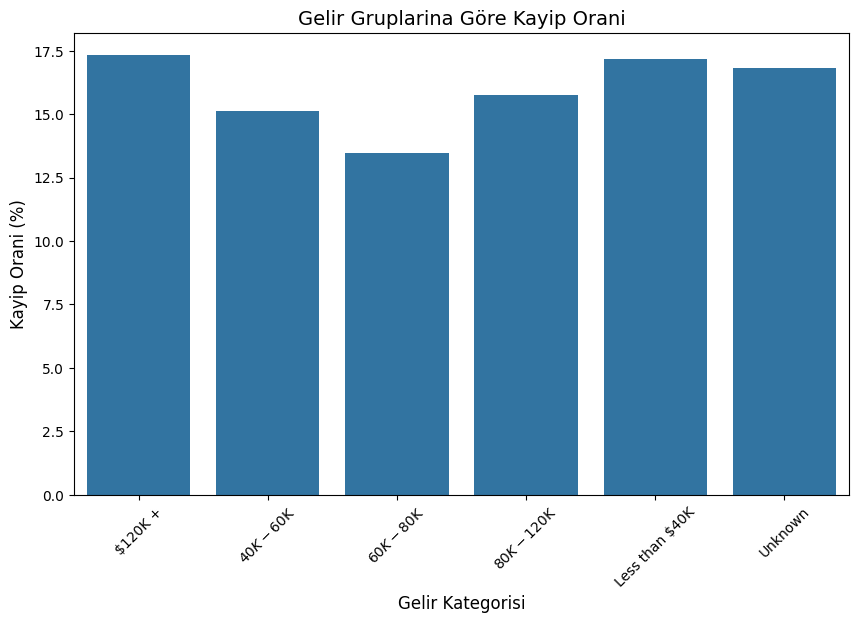

In [20]:
# Gelir gruplarına göre müsteri kaybı.

Gelir_Kayip_Orani = df.groupby("Income_Category")["Attrition_Flag"].mean() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x = Gelir_Kayip_Orani.index, y = Gelir_Kayip_Orani.values)
plt.title("Gelir Gruplarina Göre Kayip Orani", fontsize=14)
plt.xlabel("Gelir Kategorisi", fontsize = 12)
plt.ylabel("Kayip Orani (%)", fontsize = 12)
plt.xticks(rotation = 45)
plt.show()


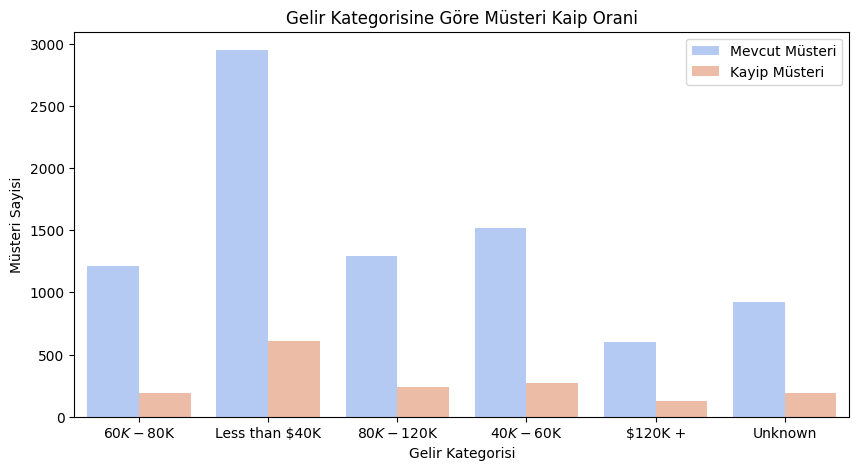

In [21]:
# Gelir kategorilerine göre müsteri kayip oranlarini inceliyoruz.

plt.figure(figsize = (10, 5))
sns.countplot(x = 'Income_Category', hue = 'Attrition_Flag', data = df, palette = 'coolwarm')
plt.title("Gelir Kategorisine Göre Müsteri Kaip Orani")
plt.xlabel("Gelir Kategorisi")
plt.ylabel("Müsteri Sayisi")
plt.legend(["Mevcut Müsteri", "Kayip Müsteri"])
plt.show()


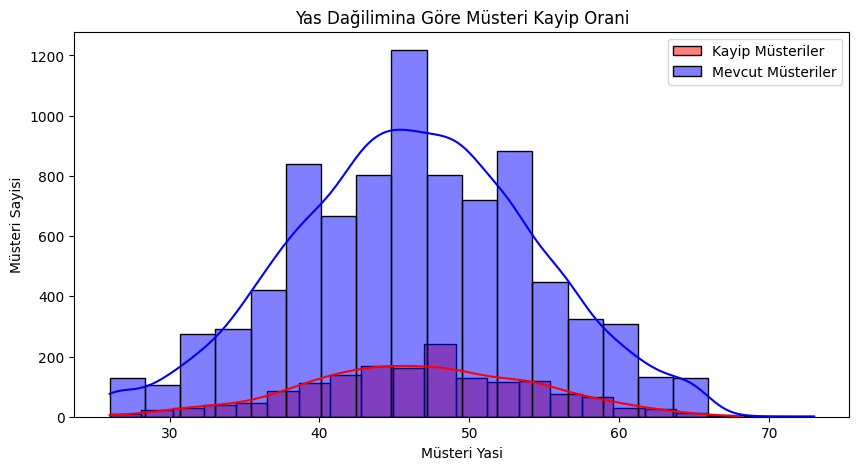

In [22]:
# Yas Dagilimina Göre Müsteri Kayip Analizi

plt.figure(figsize = (10, 5))
sns.histplot(df[df['Attrition_Flag'] == 1]['Customer_Age'], bins=20, kde=True, color='red', label='Kayip Müsteriler')
sns.histplot(df[df['Attrition_Flag'] == 0]['Customer_Age'], bins=20, kde=True, color='blue', label='Mevcut Müsteriler')
plt.title("Yas Dağilimina Göre Müsteri Kayip Orani")
plt.xlabel("Müsteri Yasi")
plt.ylabel("Müsteri Sayisi")
plt.legend()
plt.show()

# Banka Iletisimi ve Kayip Iliskisi

Kayıp oranı yüksek olan müsteriler genellikle son 12 ayda banka ile daha fazla iletisim kurmuştur.

Bu durum müsteri kaybinin önceden tahmin edilmesini saglayabilir.

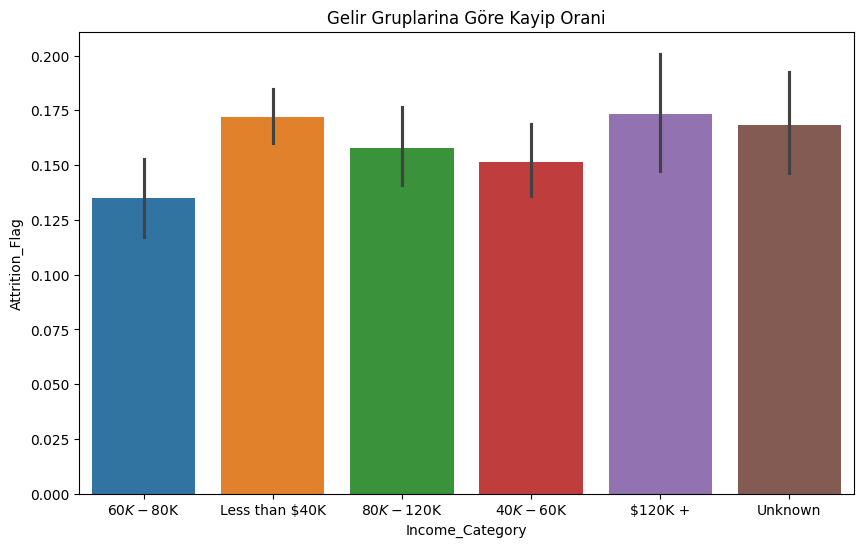

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x = 'Income_Category', y = 'Attrition_Flag', hue = 'Income_Category')
plt.title('Gelir Gruplarina Göre Kayip Orani')
plt.show()

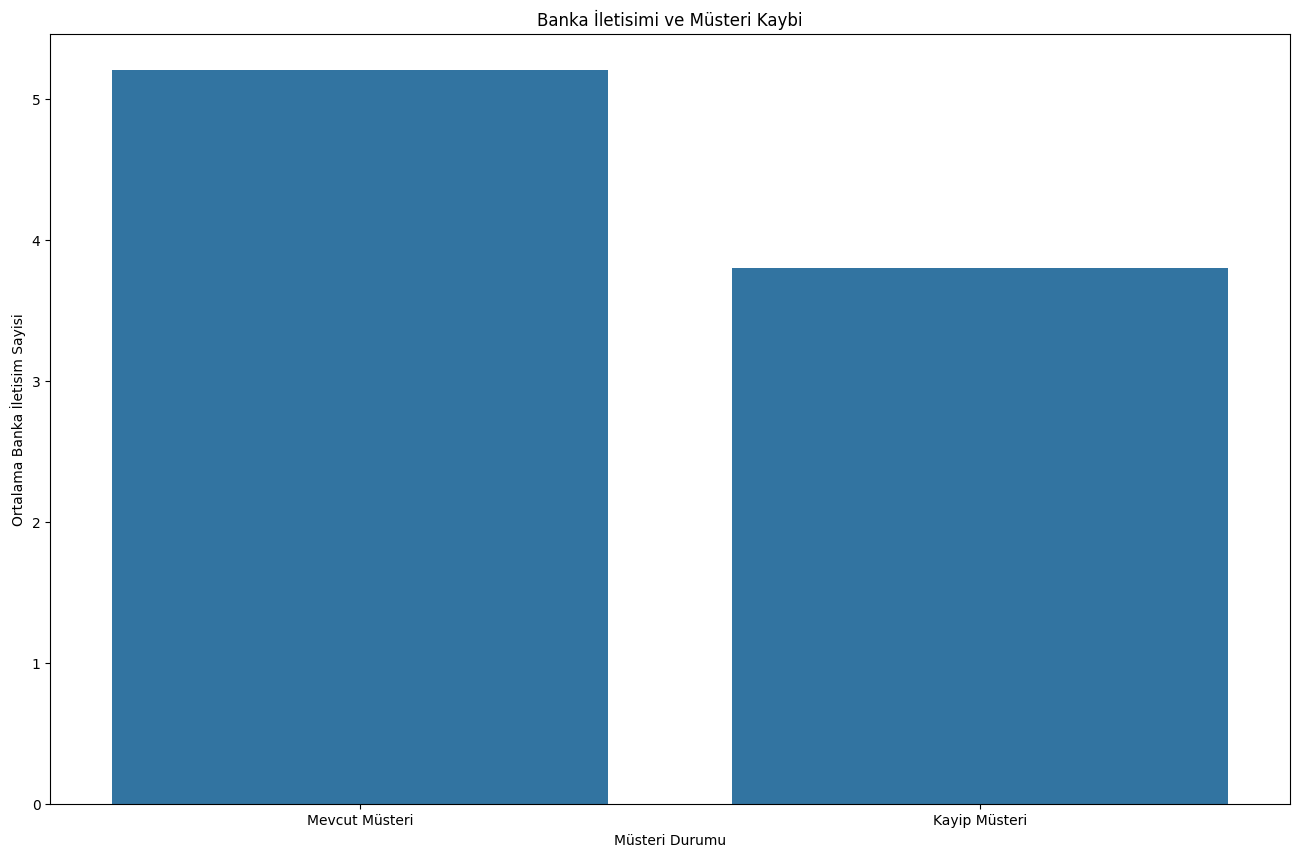

In [24]:
banka_iletisim = [5.2, 3.8]
data = pd.DataFrame({
    'Müsteri Durumu': ['Mevcut Müsteri', 'Kayip Müsteri'],
    'Ortalama Banka İletisim Sayisi': banka_iletisim
})

plt.figure(figsize=(16,10))
sns.barplot(data = data, x = 'Müsteri Durumu', y = 'Ortalama Banka İletisim Sayisi')
plt.title('Banka İletisimi ve Müsteri Kaybi')
plt.xlabel('Müsteri Durumu')
plt.ylabel('Ortalama Banka İletisim Sayisi')
plt.show()

# Promosyon Stratejileri

Banka müsterilerinin memnuniyet artirmak için cesitli promosyonlar uygulanabilir.

Mavi Kart sahipleri icin özel promosyon listesi olusturuyoruz ve riskli müsterilerin memnuniyetini arttiracak stratejiler olusturacagiz.

Sonrasinda ise Mavi Kart sahiplerine promosyonlar ve Altin Kart sahiplerine özel teklifler sunacagiz.

In [25]:
mavi_kart_musterileri.to_csv("mavi_kart_promosyon.csv", index = False)

In [26]:
# Altin Kart sahipleri icin özel teklifler belirleniyor.

altin_kart_musterileri = df[df['Card_Category'] == 'Gold']
altin_kart_musterileri.to_csv("altin_kart_teklif.csv", index = False)

In [27]:
# Kayıp riski yüksek müsterilere düzenli indirimler sunarak müsteri memnuniyetini arttirma stratejisi olusturuyoruz.

riskli_musteriler = df[df["Attrition_Flag"] == 1]
riskli_musteriler.to_csv("riskli_musteri_indirim.csv", index = False)

- Sadik Müsteriler ve Harcama Aliskanliklari

In [28]:
# Sadik müsterileri belirleyerek onlara özel firsatlar sunuyoruz.

sadik_musteriler = df[(df['Attrition_Flag'] == 0) & (df["Total_Trans_Ct"] > df["Total_Trans_Ct"].quantile(0.75))]
sadik_musteriler.to_csv("sadik_musteri_listesi.csv", index = False)

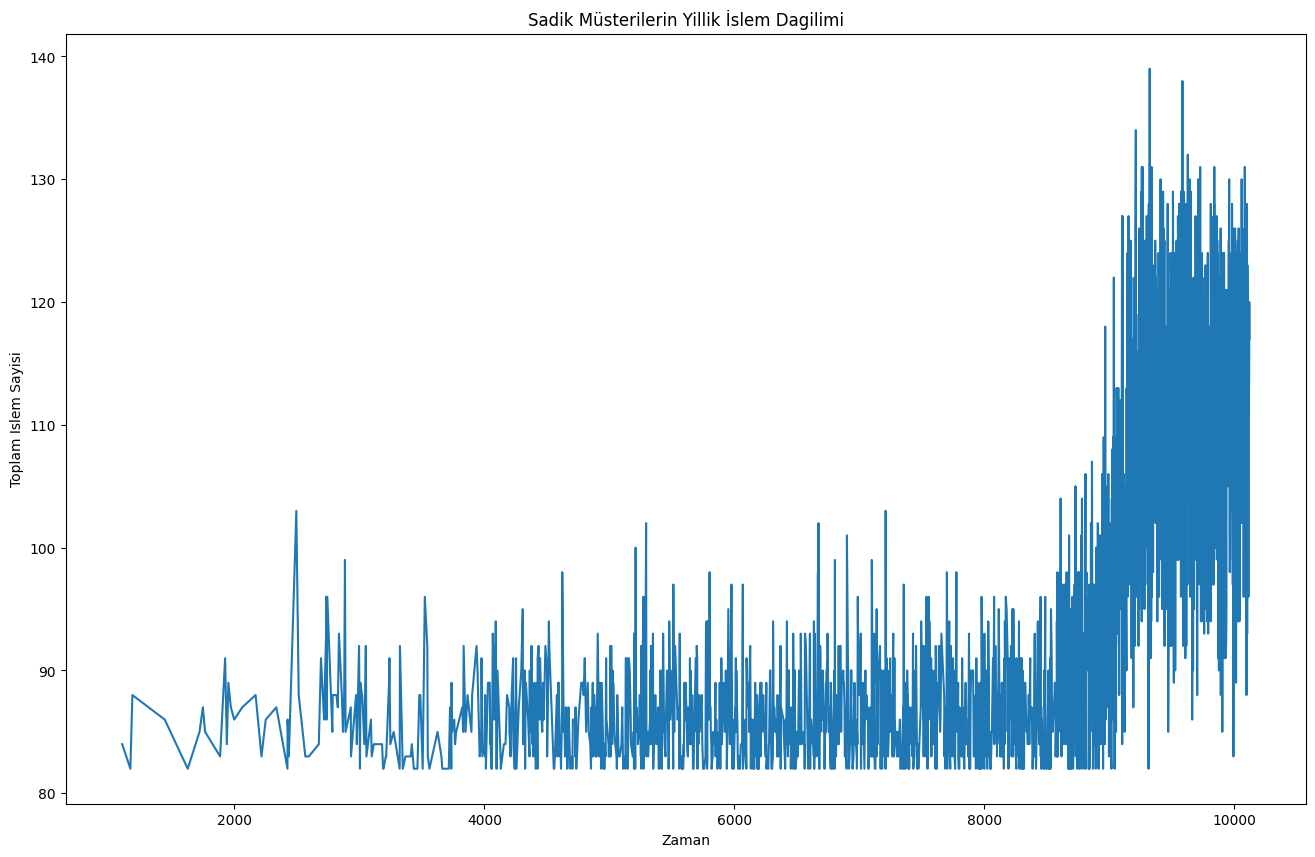

In [29]:
# Sadik müsterilerin yillik islem dagilimi

plt.figure(figsize=(16, 10))
sns.lineplot(data = sadik_musteriler, x = sadik_musteriler.index, y = 'Total_Trans_Ct')
plt.title('Sadik Müsterilerin Yillik İslem Dagilimi')
plt.xlabel('Zaman')
plt.ylabel('Toplam Islem Sayisi')
plt.show()

# Harcama Seviylerine Göre Kayip Analizi

In [30]:
yuksek_harcama = df[df["Total_Trans_Amt"] > df["Total_Trans_Amt"].quantile(0.75)]
yuksek_harcama.to_csv("yuksek_harcama_musteri_listesi.csv", index = False)

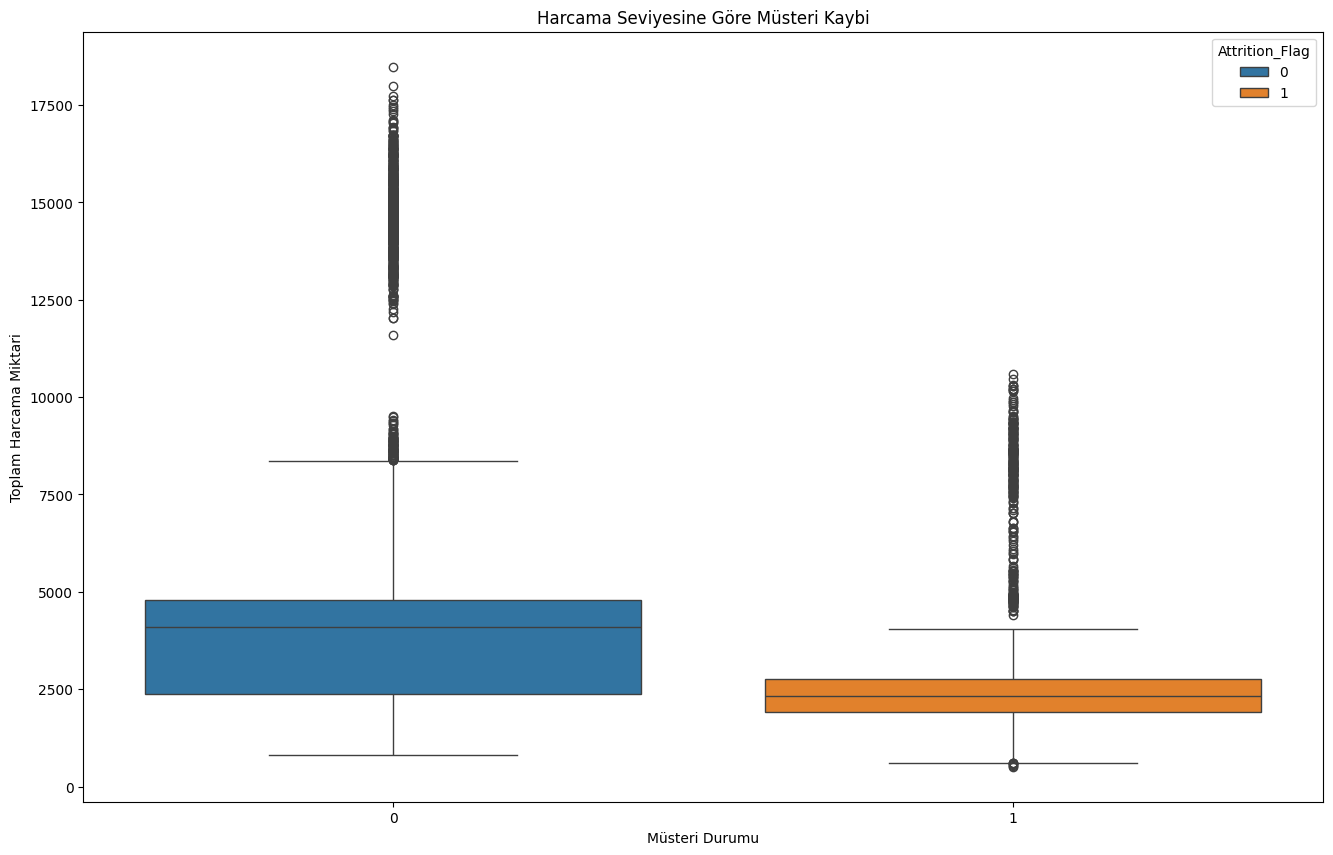

In [31]:
# Harcama seviyesine göre müsteri kaybi

plt.figure(figsize = (16,10))
sns.boxplot(data = df, x = 'Attrition_Flag', y = 'Total_Trans_Amt', hue = 'Attrition_Flag')
plt.title('Harcama Seviyesine Göre Müsteri Kaybi')
plt.xlabel('Müsteri Durumu')
plt.ylabel('Toplam Harcama Miktari')
plt.show()

# Müsteri Demografileri ve Kayip Orani Analizi

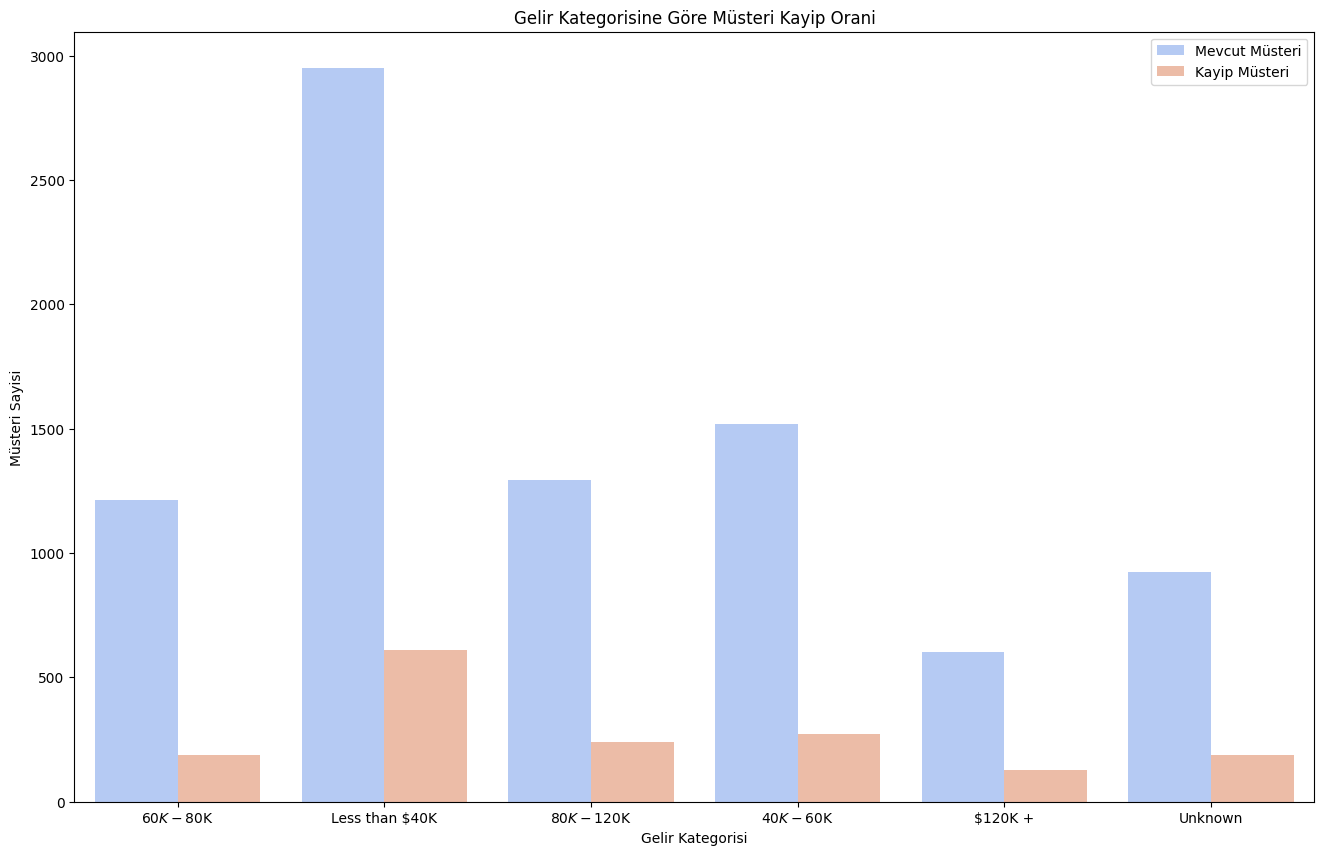

In [32]:
# Gelir kategorilerine göre müsteri kayip oranlarini inceliyoruz.

plt.figure(figsize = (16, 10))
sns.countplot(x = 'Income_Category', hue = 'Attrition_Flag', data = df, palette = 'coolwarm')
plt.title("Gelir Kategorisine Göre Müsteri Kayip Orani")
plt.xlabel("Gelir Kategorisi")
plt.ylabel("Müsteri Sayisi")
plt.legend(["Mevcut Müsteri", "Kayip Müsteri"])
plt.show()

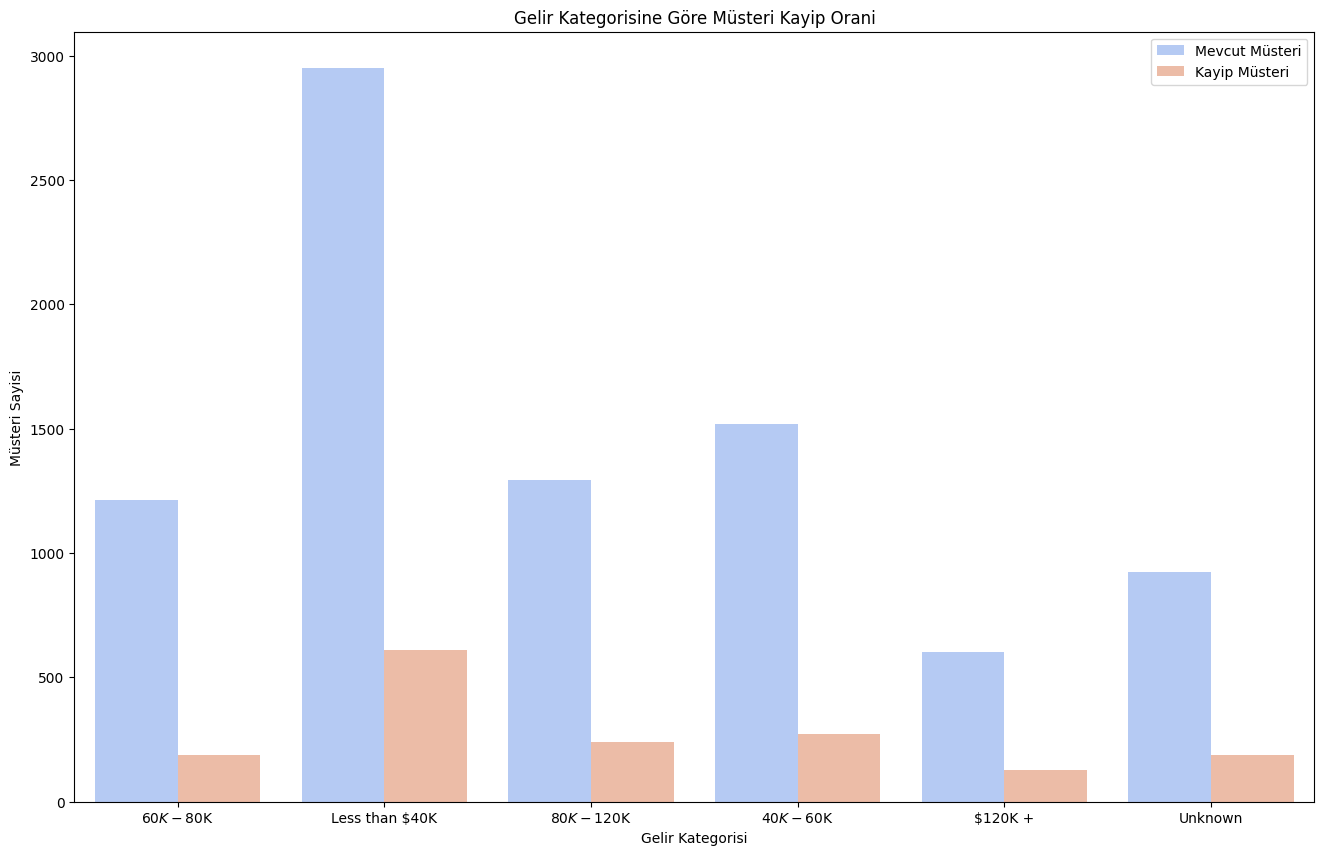

In [33]:
# Gelir kategorilerine göre müsteri kayip oranlarini inceliyoruz.

plt.figure(figsize = (16, 10))
sns.countplot(x = 'Income_Category', hue = 'Attrition_Flag', data = df, palette = 'coolwarm')
plt.title("Gelir Kategorisine Göre Müsteri Kayip Orani")
plt.xlabel("Gelir Kategorisi")
plt.ylabel("Müsteri Sayisi")
plt.legend(["Mevcut Müsteri", "Kayip Müsteri"])
plt.show()

# Mavi Kart Sahiplerini Filtreleyelim

In [34]:
df = pd.read_csv('/workspaces/PYTHON_KURSU_BITIRME_PROJESI/BankChurners.csv')
blue_card_customers = df[df['Card_Category'] == 'Blue']

# Mavi Kart sahipleri icin müsterileri filtreleme
blue_card_list = blue_card_customers[['CLIENTNUM', 'Income_Category', 'Total_Trans_Amt']]
blue_card_list.to_csv("Blue_Card_Customers.csv", index = False)

# Mavi Kart Sahipleri Icin Promosyonlar

Harca, Puan Kazan → 1.000 TL üzeri harcamalara ek %5 bonus puan

Market ve Giyim Özel İndirimi → Mavi Kart sahiplerine market ve gizim alisverislerinde özel %10 indirim

Sadakat Programi → Son 3 ayda toplam harcamasi 5.000 TL üzeri olanlara ekstra avantajlar


------------------------------------------------------------------------------

# Altin Kart Sahiplerini Filtreleyelim

In [35]:
df = pd.read_csv('/workspaces/PYTHON_KURSU_BITIRME_PROJESI/BankChurners.csv')
gold_card_customers = df[df['Card_Category'] == 'Gold']

# Altin Kart sahipleri icin müsterileri filtreleme
gold_card_list = gold_card_customers[['CLIENTNUM', 'Income_Category', 'Total_Trans_Amt']]
gold_card_list.to_csv('Gold_Card_Customers.csv', index = False)

# Altin KArt Sahipleri Icin Özel Teklifler

60K - 80K Gelir Grubu Icin → Tatil, seyahat ve restoran harcamalarinda %15 indirim

80K - 120K Gelir Grubu Icin → Yillik harcamasi 20.000 TL’yi gecenlere premium müsteri avantajlari

VIP Davetler → Özel etkinlikler, sinema ve tiyatro biletlerinde %20 indirim

------------------------------------------------------------------------------------------------------------------------------------------------------------------